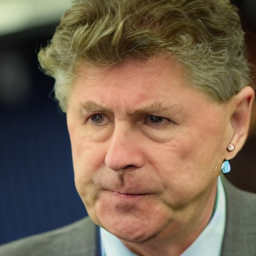

In [1]:
import torch
from PIL import Image
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
# load sample image
from lavis.models import load_model_and_preprocess
# loads InstructBLIP model
model, vis_processors, _ = load_model_and_preprocess(name="blip2_vicuna_instruct", model_type="vicuna7b", is_eval=False, device=device)
# prepare the image

In [13]:
raw_image = Image.open("/ExDF/img/ip2p/02344_15.png").convert("RGB")
display(raw_image.resize((256, 256)))
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image, "prompt": "Is this image real or fake, and if fake, which features have been manipulated?"})

['The image is real. No features have been manipulated.']